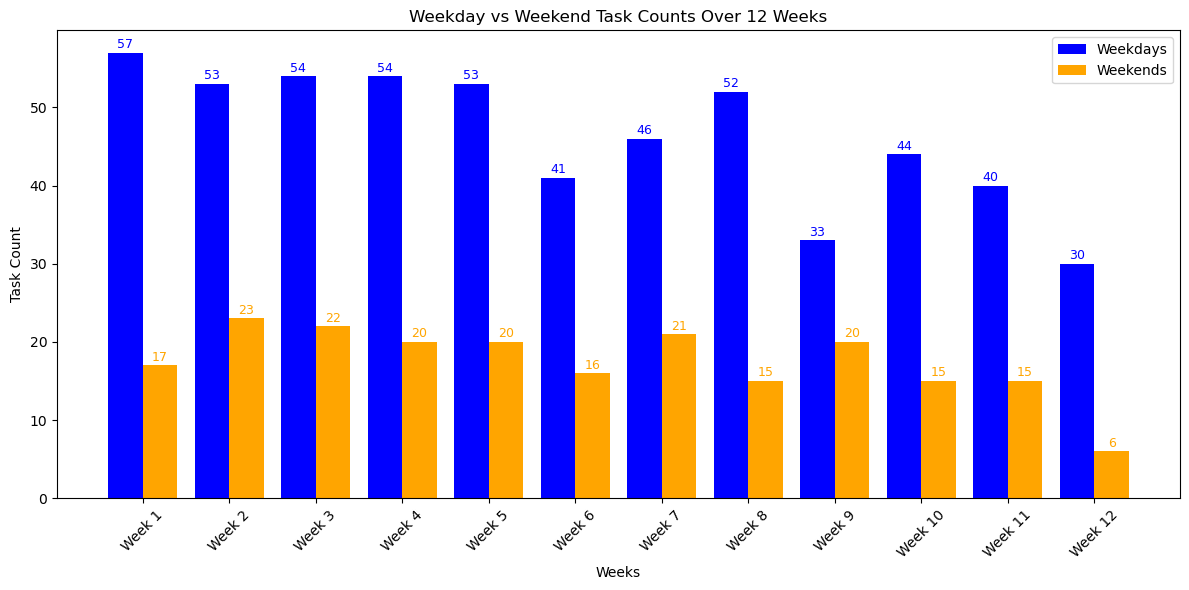

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


# Ensure inline plotting for Jupyter Notebook
def enable_inline_plotting():
    try:
        get_ipython().run_line_magic("matplotlib", "inline")
    except NameError:
        print("Not running in a Jupyter environment.")


# Call the function to enable inline plotting
enable_inline_plotting()

# Define the date range
start_date = datetime(2024, 9, 23)
end_date = datetime(2024, 12, 15)

# Generate a list of all dates in the range
date_list = [
    start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)
]

# Separate weekdays and weekends
weekdays = [date for date in date_list if date.weekday() < 5]
weekends = [date for date in date_list if date.weekday() >= 5]

# Confirm if it is 12 weeks (allowing for less than 12 weeks)
total_weeks = (end_date - start_date).days // 7 + 1  # Add 1 to include partial weeks

# Create week-based objects
week_data = {f"week{week+1}-weekday": [] for week in range(total_weeks)}
week_data.update({f"week{week+1}-weekend": [] for week in range(total_weeks)})

for date in weekdays:
    week_number = (date - start_date).days // 7 + 1
    week_data[f"week{week_number}-weekday"].append(date)

for date in weekends:
    week_number = (date - start_date).days // 7 + 1
    week_data[f"week{week_number}-weekend"].append(date)

# Load the CSV file
data = pd.read_csv("TSDA8-daily-data-filtered.csv")
data["Datetime"] = pd.to_datetime(data["Datetime"], dayfirst=True)
data["DateOnly"] = data["Datetime"].dt.date

# Count occurrences for each week
week_counts = {key: 0 for key in week_data.keys()}

# Update the filtering logic to use only the date part
for key, dates in week_data.items():
    date_only_list = [d.date() for d in dates]
    week_counts[key] = data[data["DateOnly"].isin(date_only_list)].shape[0]

# Prepare data for plotting
week_numbers = [f"Week {i+1}" for i in range(total_weeks)]
weekday_counts = [week_counts[f"week{week+1}-weekday"] for week in range(total_weeks)]
weekend_counts = [week_counts[f"week{week+1}-weekend"] for week in range(total_weeks)]

# Plot the pair bar chart
x = range(total_weeks)
width = 0.4
plt.figure(figsize=(12, 6))
plt.bar(
    [i - width / 2 for i in x],
    weekday_counts,
    width=width,
    label="Weekdays",
    color="blue",
)
plt.bar(
    [i + width / 2 for i in x],
    weekend_counts,
    width=width,
    label="Weekends",
    color="orange",
)
# Add count labels on top of each bar
for i in x:
    plt.text(
        i - width / 2,
        weekday_counts[i] + 0.2,
        str(weekday_counts[i]),
        ha="center",
        va="bottom",
        fontsize=9,
        color="blue",
    )
    plt.text(
        i + width / 2,
        weekend_counts[i] + 0.2,
        str(weekend_counts[i]),
        ha="center",
        va="bottom",
        fontsize=9,
        color="orange",
    )
plt.xlabel("Weeks")
plt.ylabel("Task Count")
plt.title("Weekday vs Weekend Task Counts Over 12 Weeks")
plt.xticks(x, week_numbers, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()